Step1/2:

Imports all the libraries and prepares Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

enc = LabelEncoder()

df=pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [2]:
df=df.replace(r'^\s*$', np.nan, regex=True)
df.dropna(inplace=True,axis=0)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
df1=df.copy()

df1 = df1.drop(['id','lat','long','yr_renovated','view'], axis=1)
df1

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,98178,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,98125,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,1933,98028,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,98136,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,3,8,1530,0,2009,98103,1530,1509
21609,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,3,8,2310,0,2014,98146,1830,7200
21610,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,3,7,1020,0,2009,98144,1020,2007
21611,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,3,8,1600,0,2004,98027,1410,1287


In [4]:
Xprep = df1.copy()
Xprep = df1.drop(['price'], axis = 1)
y= df1[['price']]
Xprep

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
0,20141013T000000,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,98178,1340,5650
1,20141209T000000,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,98125,1690,7639
2,20150225T000000,2,1.00,770,10000,1.0,0,3,6,770,0,1933,98028,2720,8062
3,20141209T000000,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,98136,1360,5000
4,20150218T000000,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,3,2.50,1530,1131,3.0,0,3,8,1530,0,2009,98103,1530,1509
21609,20150223T000000,4,2.50,2310,5813,2.0,0,3,8,2310,0,2014,98146,1830,7200
21610,20140623T000000,2,0.75,1020,1350,2.0,0,3,7,1020,0,2009,98144,1020,2007
21611,20150116T000000,3,2.50,1600,2388,2.0,0,3,8,1600,0,2004,98027,1410,1287


Categorical Data:
Date, Zipcode,Year Built


In [5]:
Xenc= Xprep.copy()
Xenc['date']= enc.fit_transform(Xenc.date.values)
Xenc['zipcode']= enc.fit_transform(Xenc.zipcode.values)
Xenc['yr_built']= enc.fit_transform(Xenc.yr_built.values)
Xenc

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
0,164,3,1.00,1180,5650,1.0,0,3,7,1180,0,55,66,1340,5650
1,220,3,2.25,2570,7242,2.0,0,3,7,2170,400,51,55,1690,7639
2,290,2,1.00,770,10000,1.0,0,3,6,770,0,33,16,2720,8062
3,220,4,3.00,1960,5000,1.0,0,5,7,1050,910,65,58,1360,5000
4,283,3,2.00,1680,8080,1.0,0,3,8,1680,0,87,37,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,19,3,2.50,1530,1131,3.0,0,3,8,1530,0,109,42,1530,1509
21609,288,4,2.50,2310,5813,2.0,0,3,8,2310,0,114,60,1830,7200
21610,52,2,0.75,1020,1350,2.0,0,3,7,1020,0,109,59,1020,2007
21611,252,3,2.50,1600,2388,2.0,0,3,8,1600,0,104,15,1410,1287


Data to scale:
Sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15

In [6]:
Xscal = Xenc.copy()
col_names = ['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']
feat = Xscal[col_names]
scaler = StandardScaler().fit(feat.values)
feat = scaler.transform(feat.values)
Xscal[col_names] = feat
Xscal

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
0,164,3,1.00,-0.979835,-0.228321,1.0,0,3,7,-0.734708,-0.658681,55,66,-0.943355,-0.260715
1,220,3,2.25,0.533634,-0.189885,2.0,0,3,7,0.460841,0.245141,51,55,-0.432686,-0.187868
2,290,2,1.00,-1.426254,-0.123298,1.0,0,3,6,-1.229834,-0.658681,33,16,1.070140,-0.172375
3,220,4,3.00,-0.130550,-0.244014,1.0,0,5,7,-0.891699,1.397515,65,58,-0.914174,-0.284522
4,283,3,2.00,-0.435422,-0.169653,1.0,0,3,8,-0.130895,-0.658681,87,37,-0.272190,-0.192849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,19,3,2.50,-0.598746,-0.337424,3.0,0,3,8,-0.312039,-0.658681,109,42,-0.666135,-0.412381
21609,288,4,2.50,0.250539,-0.224386,2.0,0,3,8,0.629908,-0.658681,114,60,-0.228419,-0.203946
21610,52,2,0.75,-1.154047,-0.332137,2.0,0,3,7,-0.927928,-0.658681,109,59,-1.410253,-0.394141
21611,252,3,2.50,-0.522528,-0.307076,2.0,0,3,8,-0.227505,-0.658681,104,15,-0.841221,-0.420511


In [7]:
encX_train, encX_test, ency_train, ency_test = train_test_split(Xenc, y, test_size=0.20, random_state=0)

In [8]:
scalX_train, scalX_test, scaly_train, scaly_test = train_test_split(Xscal, y, test_size=0.20, random_state=0)

Step 3:

Builds and Trains the individual models

Multiple Linear Regression Model

In [9]:
linear_model = LinearRegression()
linear_model.fit(scalX_train, scaly_train)
linescore = linear_model.score(scalX_test,scaly_test)
line_pred = linear_model.predict(scalX_test)
print('Linear regression has a score of',linescore)

Linear regression has a score of 0.6391833703325682


Polynomial Regression Model

In [53]:
from sklearn.preprocessing import PolynomialFeatures

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
poly=PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(Xscal)

x_trainp, x_testp, y_trainp, y_testp = train_test_split(x_poly, y, test_size=0.2, random_state=0)
polymodel = LinearRegression()
polymodel.fit(x_trainp, y_trainp)

polyscore = polymodel.score(x_testp, y_testp)
print(polyscore)




0.7224133607053154


KNN Regression Model

In [11]:
scores = []
for i in range(1,10):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(scalX_train,scaly_train)
    score_i = knn.score(scalX_test,scaly_test)
    scores.append(score_i)

Text(0, 0.5, 'Accuracy')

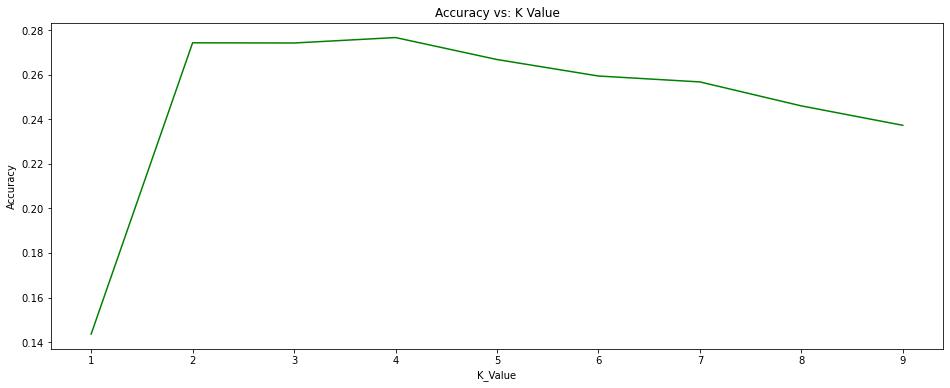

In [12]:
plt.figure(figsize =(16,6))
plt.plot(range(1,10),scores,color = 'green')
plt.title('Accuracy vs: K Value')
plt.xlabel('K_Value')
plt.ylabel('Accuracy')

In [13]:
best_knn = scores.index(max(scores))+1
knnmodel = KNeighborsRegressor(n_neighbors=best_knn)
knnmodel.fit(scalX_train, scaly_train) 
knn_pred = knnmodel.predict(scalX_test)
knnscore = knnmodel.score(scalX_test,scaly_test) #Gets the accuracy of our end result using .score
print(knnscore)

0.2767283965503494


SVR Prep(for both linear and non linear)

In [14]:
linear_param_grid = {'C': [0.1,1, 10, 100, 1000],
              'gamma': [1,0.1,0.01,0.001,0.0001],
              'kernel': ['linear']} 

In [15]:
non_linear_param_grid = {'C': [0.1,1, 10, 100, 1000],
              'gamma': [1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf']} 

In [16]:
line_grid = GridSearchCV(SVR(), linear_param_grid, verbose=2, refit = True)

In [17]:
non_line_grid = GridSearchCV(SVR(), non_linear_param_grid, verbose=2, refit = True)

line_grid.fit(scalX_train,scaly_train)

print('The best parameters are %s with a score of %0.2f' 
      % (line_grid.best_params_, line_grid.best_score_))

non_line_grid.fit(scalX_train,scaly_train)

print('The best parameters are %s with a score of %0.2f' 
      % (non_line_grid.best_params_, non_line_grid.best_score_))

Linear SVR

In [18]:
linereg = SVR(kernel='linear', C = 1000, gamma = 1)
linereg.fit(scalX_train, scaly_train)
SVRL_pred = linereg.predict(scalX_test)
SVRLscore = linereg.score(scalX_test,scaly_test)
print(SVRLscore)

0.6041698415457153


Non Linear SVR

In [19]:
nolinereg = SVR(kernel='rbf', C = 1000, gamma = 1)
nolinereg.fit(scalX_train, scaly_train)
SVRNL_pred = nolinereg.predict(scalX_test)
SVRNLscore = nolinereg.score(scalX_test,scaly_test)
print(SVRNLscore)

-0.04921685711003465


Decision Tree Regression

In [20]:
DTmodel = DecisionTreeRegressor(criterion='mae',random_state=0)
DTmodel.fit(scalX_train, scaly_train)
DT_pred = DTmodel.predict(scalX_test)
DTscore = DTmodel.score(scalX_test,scaly_test)
print(DTscore)

0.6840657999838835


Random Forest Regression

In [21]:
RFmodel = RandomForestRegressor(n_estimators= 50,criterion='mae',random_state=0)
RFmodel.fit(scalX_train, scaly_train)
RF_pred = RFmodel.predict(scalX_test)
RFscore = RFmodel.score(scalX_test,scaly_test)
print(RFscore)

0.8248173526861051


Step 4:
Prints the individual models' scores

In [39]:
print('The scores are: MultipleLinearRegression:',linescore, 'PolynomialRegression:',polyscore, 'KNNRegression:',knnscore,
      'LinearSVR:', SVRLscore, 'NonLinearSVR:',SVRNLscore, 'DecisionTreeRegression:',DTscore, 'RandomForestRegression:',RFscore)

The scores are: MultipleLinearRegression: 0.6391833703325682 PolynomialRegression: 0.7224133607053154 KNNRegression: 0.2767283965503494 LinearSVR: 0.6041698415457153 NonLinearSVR: -0.04921685711003465 DecisionTreeRegression: 0.6840657999838835 RandomForestRegression: 0.8248173526861051


Step 5:

Inputs the information and gets the resulting house price

In [23]:
df2 = {'bedrooms': 3, 'bathrooms': 2, 'floors': 1, 'zipcode': 16}

Xenc = Xenc.append(df2, ignore_index = True)

Xenc

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
0,164.0,3,1.00,1180.0,5650.0,1.0,0.0,3.0,7.0,1180.0,0.0,55.0,66,1340.0,5650.0
1,220.0,3,2.25,2570.0,7242.0,2.0,0.0,3.0,7.0,2170.0,400.0,51.0,55,1690.0,7639.0
2,290.0,2,1.00,770.0,10000.0,1.0,0.0,3.0,6.0,770.0,0.0,33.0,16,2720.0,8062.0
3,220.0,4,3.00,1960.0,5000.0,1.0,0.0,5.0,7.0,1050.0,910.0,65.0,58,1360.0,5000.0
4,283.0,3,2.00,1680.0,8080.0,1.0,0.0,3.0,8.0,1680.0,0.0,87.0,37,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21609,288.0,4,2.50,2310.0,5813.0,2.0,0.0,3.0,8.0,2310.0,0.0,114.0,60,1830.0,7200.0
21610,52.0,2,0.75,1020.0,1350.0,2.0,0.0,3.0,7.0,1020.0,0.0,109.0,59,1020.0,2007.0
21611,252.0,3,2.50,1600.0,2388.0,2.0,0.0,3.0,8.0,1600.0,0.0,104.0,15,1410.0,1287.0
21612,166.0,2,0.75,1020.0,1076.0,2.0,0.0,3.0,7.0,1020.0,0.0,108.0,59,1020.0,1357.0


In [24]:
def Guessing(potato):    
    LGuess=linear_model.predict(potato)
    PGuess=polymodel.predict(potato)
    KGuess=knnmodel.predict(potato)
    LSGuess=linereg.predict(potato)
    NLSGuess=nolinereg.predict(potato)
    DTGuess=DTmodel.predict(potato)
    RFGuess=RFmodel.score(potato)
    print('The Prices the Models come up with are:  Linear Regression:',LGuess,'Polynomial Regression:',PGuess,'KNN Regression:'
         ,KGuess,'Linear SVR:', LSGuess,'Non-Linear SVR:',NLSGuess,'Decision Tree Regression:',DTGuess
          ,'Random Forest Regression:',RFGuess)
    return


In [25]:
Guess=Xenc.iloc[21613:, :]

Guess=Guess.replace(np.nan, 0)

In [29]:
Guess

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
21613,0.0,3,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,16,0.0,0.0


In [54]:
def Guessing(Guess):
    LGuess=linear_model.predict(Guess)
    #PGuess=polymodel.predict(Guess) add this if you want to poly the thing(poly doesnt work nice) ,PGuess,'KNN Regression:'
    KGuess=knnmodel.predict(Guess)
    LSGuess=linereg.predict(Guess)
    NLSGuess=nolinereg.predict(Guess)
    DTGuess=DTmodel.predict(Guess)
    RFGuess=RFmodel.predict(Guess)
    print('The Prices the Models come up with are:  Linear Regression:',LGuess,'Polynomial Regression:'
         ,KGuess,'Linear SVR:', LSGuess,'Non-Linear SVR:',NLSGuess,'Decision Tree Regression:',DTGuess
          ,'Random Forest Regression:',RFGuess)
    return

In [55]:
Guessing(Guess)

The Prices the Models come up with are:  Linear Regression: [[-227781.34958072]] Polynomial Regression: [[286175.]] Linear SVR: [-218832.82342134] Non-Linear SVR: [452718.32845801] Decision Tree Regression: [1200000.] Random Forest Regression: [446643.8]
